## Import Library

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Load Dataset

In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/WilbertBryan/dataset/refs/heads/main/Adult_Income.csv')
data.sample(10)

# Mengambil data menggunakan read_csv dan menampilkan 10 random data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32233,34,Private,220362,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
3691,33,Self-emp-not-inc,58702,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Wife,White,Female,3103,0,50,United-States,>50K
19232,42,Private,175515,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
13635,29,Private,263855,12th,8,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
3588,29,Private,157612,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,3325,0,45,United-States,<=50K
20786,27,Private,177057,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
19288,36,Self-emp-not-inc,84848,HS-grad,9,Separated,Other-service,Not-in-family,White,Female,0,0,16,United-States,<=50K
24679,37,Private,260093,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
16996,54,Private,221915,Some-college,10,Widowed,Craft-repair,Unmarried,White,Female,0,0,50,United-States,<=50K
21755,37,Private,86551,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K


## Exploratory Data Analysis

In [30]:
data.info()
# Terdapat 14 variable dan terdapat 32561 data. Target Variabelya adalah income
# Data set memiliki 6 numeric dan 9 string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [31]:
data.replace('?', np.nan, inplace=True)
data.isnull().sum()
# mereplace ? menjadi missing value dan mengecek total missing value di setiap variabel

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [32]:
data.describe()
# Menampilkan distribusi data / statistik. Ini menampilkan jumlah data, rata-rata, standard deviasi,
# minimum data, quartal 1,2, dan 3 dan juga maximum data.

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
for col in ['workclass', 'occupation', 'native.country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.isnull().sum()

# Mengisi missing value dengan menggunakan mode. dan menampilkan ulang missing value

<ipython-input-33-8604d6cc4e21>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


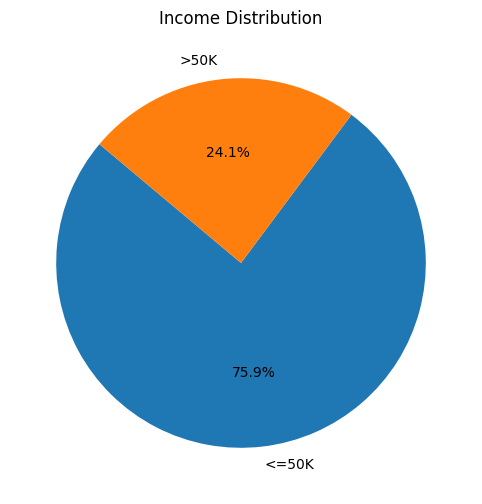

In [34]:
income_counts = data['income'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Income Distribution')
plt.show()

# income distribution >50k terdapat 24.1% dan <=50k sebanyak 75.9%. data disini imbalance

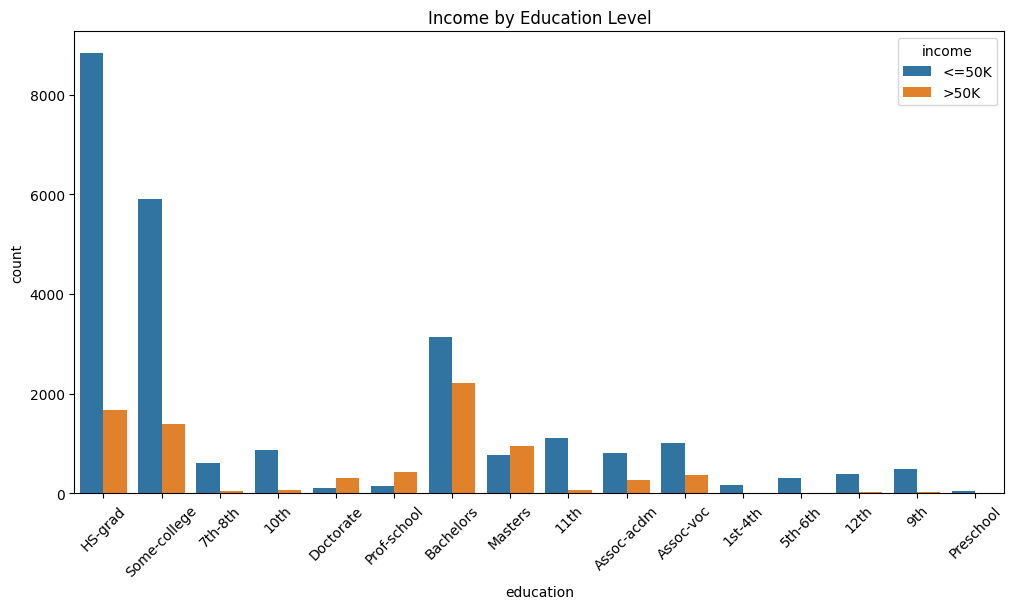

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=data)
plt.title('Income by Education Level')
plt.xticks(rotation=45)
plt.show()
# Menampilkan tingkat edukasi dengan jumlah Income. HS-graduate memiliki data/jumlah terbanyak dan memiliki income <=50k.
# income tertinggi berasal dari Bachelors

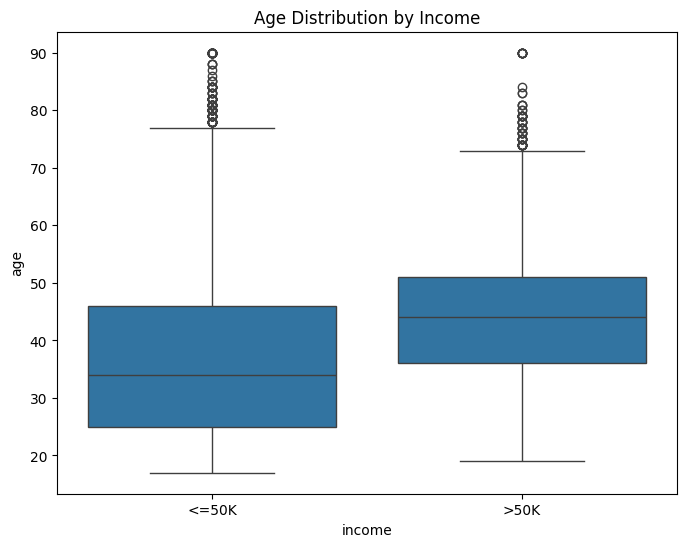

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Age Distribution by Income')
plt.show()
# Menampilkan distribusi umur dengan pendapatan.

In [37]:
# Drop 'fnlwgt' and 'education' columns
data = data.drop(['fnlwgt', 'education'], axis=1)
data.head()

# menghapus column fnlwgt dan education karena education sama seperti education.num

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [38]:
data['workclass']=data['workclass'].apply(lambda x:0 if x =="Private" else 1 if x =='Self-emp-not-inc'
                                                  else 2 if x =='Local-gov' else 3 if x =='State-gov'
                                                    else 4 if x == 'Self-emp-inc' else 5 if x == 'Federal-gov'
                                                     else 6 if x == 'Without-pay' else 6 if x == 'Never-worked'
                                                        else x)

# transform Maritial Status column from str to int
data['marital.status']=data['marital.status'].apply(lambda x:0 if x =="Married-civ-spouse" else 1 if x =='Never-married'
                                                  else 2 if x =='Divorced' else 3 if x =='Separated'
                                                  else 4 if x =='Widowed' else 5 if x =='Married-spouse-absent'
                                                  else 6 if x =='Married-AF-spouse' else x)

# transform Occupation column from str to int
data['occupation']=data['occupation'].apply(lambda x:0 if x =="Prof-specialty" else 1 if x =='Craft-repair'
                                                  else 2 if x =='Exec-managerial' else 3 if x =='Adm-clerical'
                                                  else 4 if x =='Sales' else 5 if x =='Other-service'
                                                  else 6 if x =='Machine-op-inspct'  else 7 if x =='Transport-moving'
                                                  else 8 if x =='Handlers-cleaners' else 9 if x =='Farming-fishing'
                                                  else 10 if x =='Tech-support' else 11 if x =='Protective-serv'
                                                   else 12 if x =='Priv-house-serv'  else 13 if x =='Armed-Forces'
                                                    else x)

# transform Relationship column from str to int
data['relationship']=data['relationship'].apply(lambda x:0 if x =="Husband" else 1 if x =='Not-in-family'
                                                  else 2 if x =='Own-child' else 3 if x =='Unmarried'
                                                  else 4 if x =='Wife' else 5 if x =='Other-relative'
                                                    else x)

# transform Race column from str to int
data['race']=data['race'].apply(lambda x:0 if x =='White' else 1 if x =='Black'
                                                  else 2 if x =='Asian-Pac-Islander' else 3 if x =='Amer-Indian-Eskimo'
                                                  else 4 if x =='Other' else x)

# transform Gender column from str to int
data['sex']=data['sex'].apply(lambda x:0 if x =="Male" else 1 if x =='Female'
                                                  else x)

# transform Income column from str to int
data['income']=data['income'].apply(lambda x:0 if x =="<=50K" else 1 if x =='>50K'
                                                  else x)

label_encoder = LabelEncoder()
data['native.country'] = label_encoder.fit_transform(data['native.country'])

# Mengubah string menjadi int


In [39]:
data.info()
# mengecek data telah menjadi int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   marital.status  32561 non-null  int64
 4   occupation      32561 non-null  int64
 5   relationship    32561 non-null  int64
 6   race            32561 non-null  int64
 7   sex             32561 non-null  int64
 8   capital.gain    32561 non-null  int64
 9   capital.loss    32561 non-null  int64
 10  hours.per.week  32561 non-null  int64
 11  native.country  32561 non-null  int64
 12  income          32561 non-null  int64
dtypes: int64(13)
memory usage: 3.2 MB


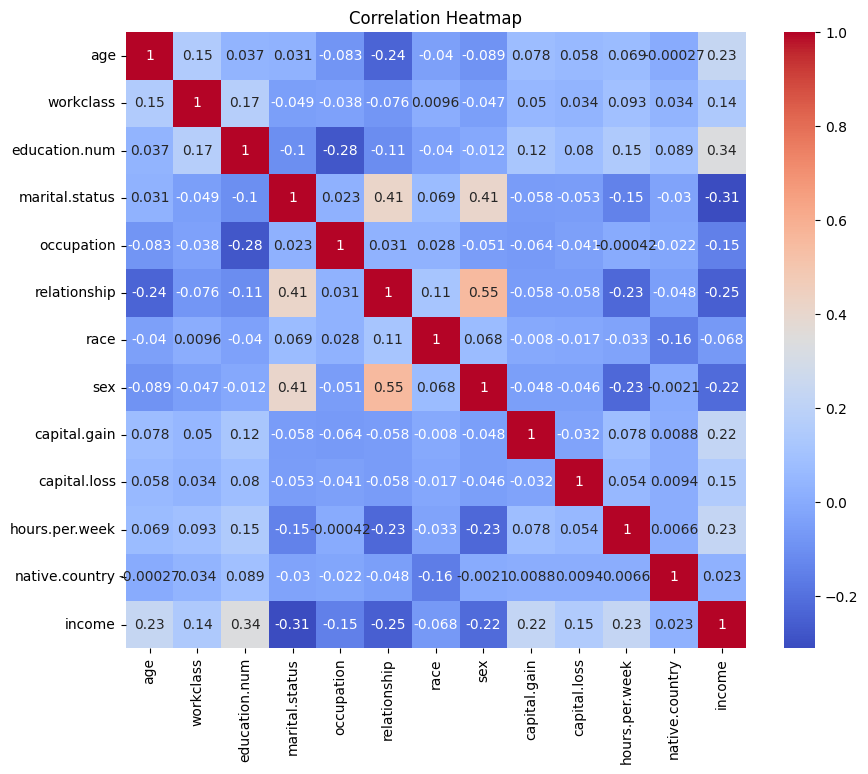

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# menampilkan korelasi antar variabel. education dan income memiliki korelasi yang kuat

## Machine Learning

In [41]:
X=data.drop('income',axis=1)
y=data['income']
# y adalah target variabel/ variabel yang di prediksi dan X adalah variabel yang memprediksi target

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# memisiah data dengan 20% untuk testing dan 80% untuk training

In [43]:
print(X_train.shape)
print(X_test.shape)

# Untuk X_train terdapat 26048 row/data dan terdapat 12 column untuk training data.
# Untuk X_test terdapat 6513 row/data dan terdapat  12 column untuk testing data.

(26048, 12)
(6513, 12)


## Decision Tree
using entropy

In [44]:
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
model_entropy.fit(X_train, y_train)

# menggunakan model decision tree entropy dengan max_depth 3 dan random state 0

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [45]:
y_pred_entropy = model_entropy.predict(X_test)

# membuat y_pred_entropy untuk memprediksi X_test

In [46]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy:", accuracy_entropy)

# Akurasi entropy sebesar 0.84 atau 84%

Model accuracy score with criterion entropy: 0.8447719944725933


In [47]:
y_train_pred_entropy = model_entropy.predict(X_train)
accuracy_train_entropy = accuracy_score(y_train, y_train_pred_entropy)
accuracy_test_entropy = accuracy_score(y_test, y_pred_entropy)
print("Train Accuracy:", accuracy_train_entropy)
print("Test Accuracy:", accuracy_test_entropy)
# Hasil dari train dan test akurasi menunjukan hasil yang tidak overfitting maupun underfitting.
# Train dan test memiliki nilai yang seimbang

Train Accuracy: 0.8435196560196561
Test Accuracy: 0.8447719944725933


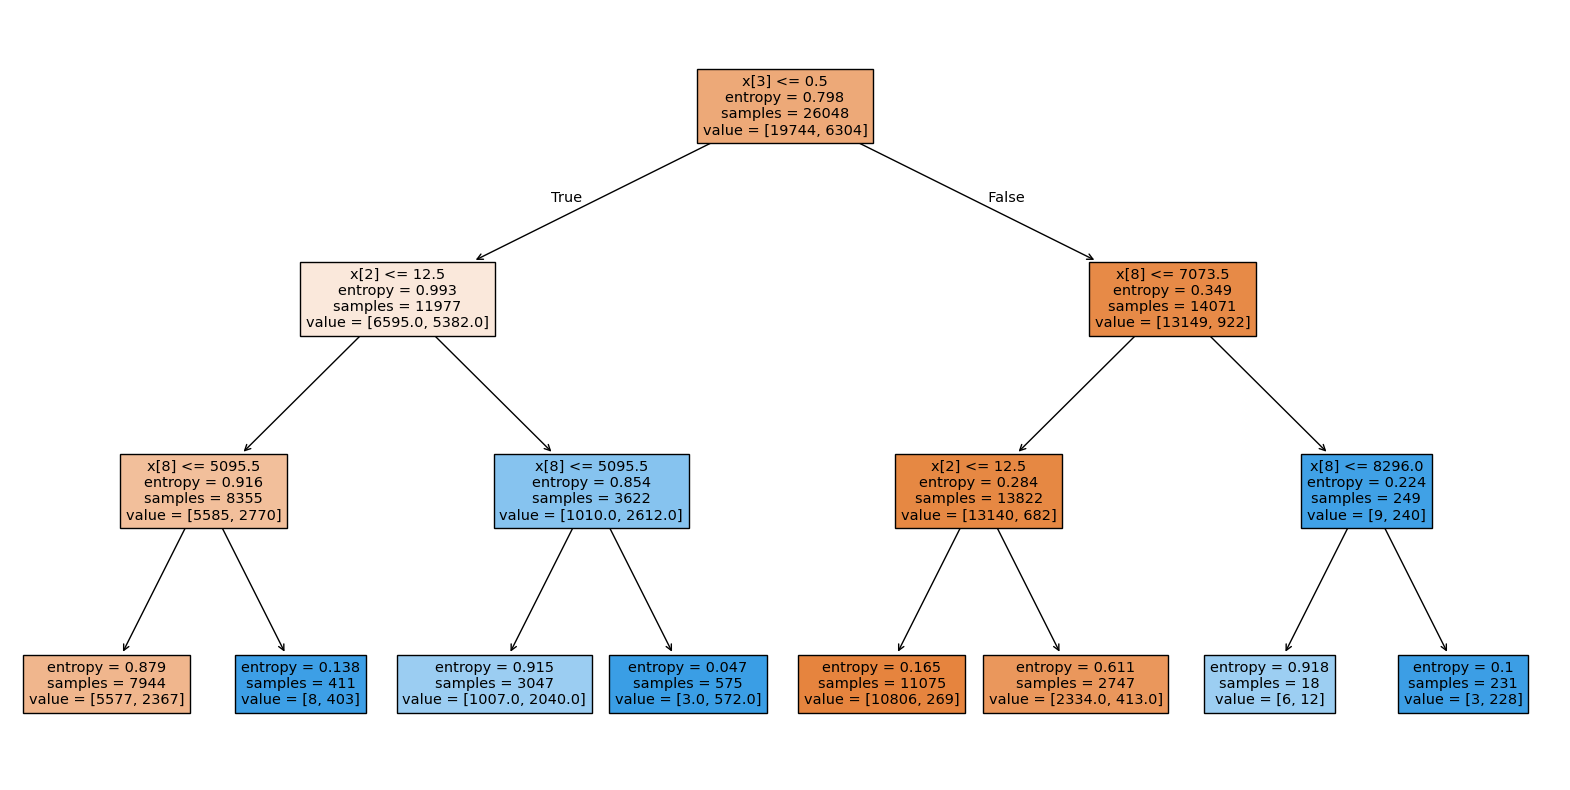

In [48]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_entropy, filled=True)
plt.show()

using gini

In [49]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
model_gini.fit(X_train, y_train)

# menggunakan model decision tree gini dengan max_depth 3 dan random state 0

DecisionTreeClassifier(max_depth=3, random_state=0)

In [50]:
y_pred_gini = model_gini.predict(X_test)

# membuat y_pred_gini untuk memprediksi X_test

In [51]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini:", accuracy_gini)
# Akurasi gini sebesar 0.84 atau 84%

Model accuracy score with criterion gini: 0.8450790726239829


In [52]:
y_train_pred_gini = model_gini.predict(X_train)
accuracy_train_gini = accuracy_score(y_train, y_train_pred_gini)
accuracy_test_gini = accuracy_score(y_test, y_pred_gini)
print("Train Accuracy:", accuracy_train_gini)
print("Test Accuracy:", accuracy_test_gini)
# Hasil dari train dan test akurasi menunjukan hasil yang tidak overfitting maupun underfitting.

Train Accuracy: 0.8435964373464373
Test Accuracy: 0.8450790726239829


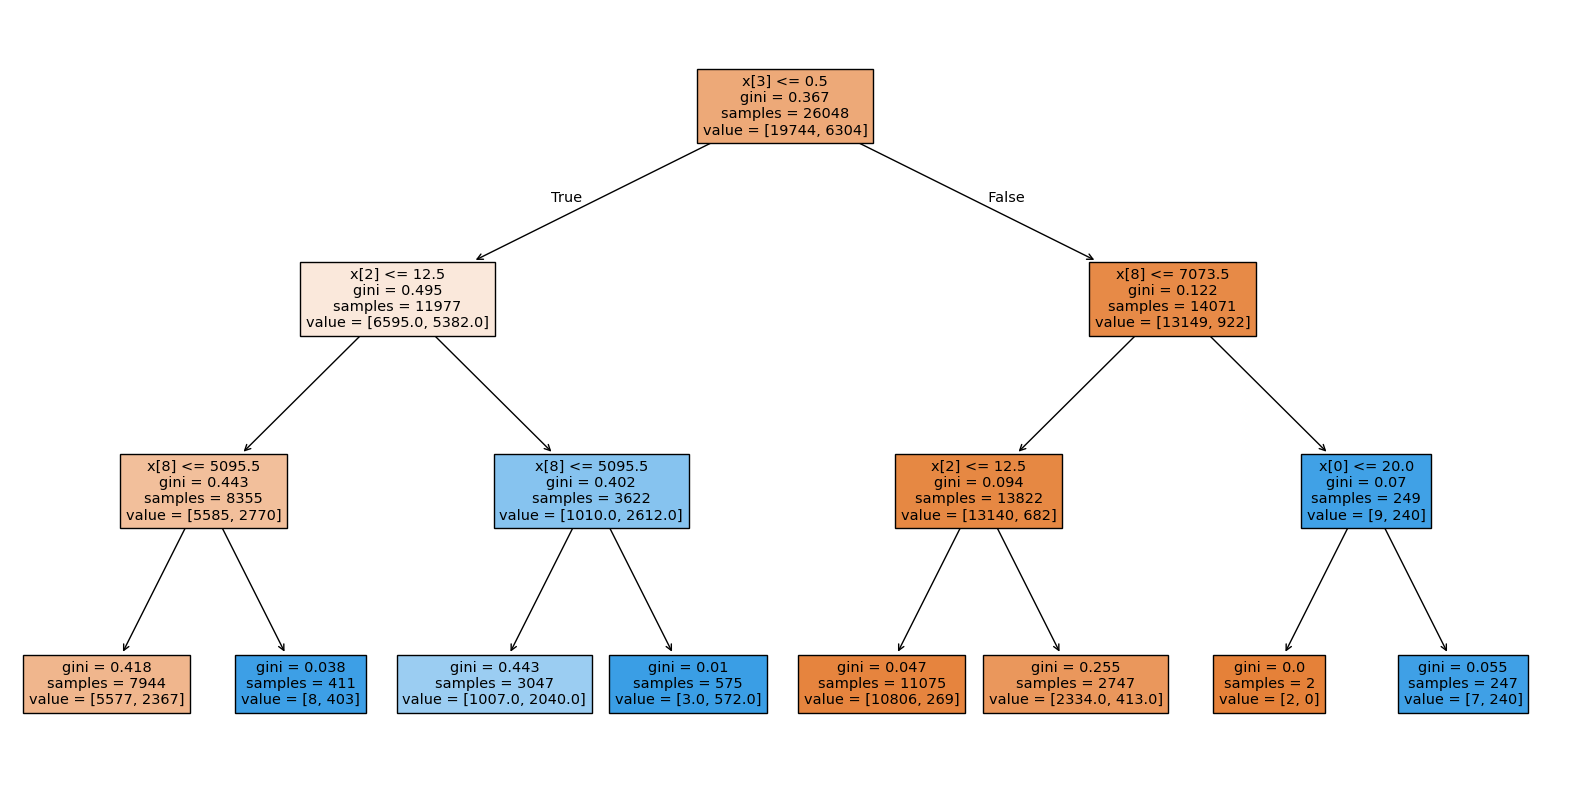

In [53]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_gini, filled=True)
plt.show()

In [54]:
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:")
print(cm_entropy)
print("\nConfusion Matrix Gini:")
print(cm_gini)

# Menampilkan confusion matrix dari entropy dan gini index

Confusion Matrix Entropy:
[[4726  250]
 [ 761  776]]

Confusion Matrix Gini:
[[4728  248]
 [ 761  776]]


## Naive Bayes

In [55]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
# menggunakan model naive bayes

GaussianNB()

In [56]:
y_pred_nb = model_nb.predict(X_test)

# membuat y_pred_nb untuk memprediksi X_test

In [57]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Model accuracy score with Naive Bayes:", accuracy_nb)

# Akurasi naive bayes sebesar 0.80 atau 80%

cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix Naive Bayes:")
print(cm_nb)

# Menampilkan confusion matrix dari naive bayes

Model accuracy score with Naive Bayes: 0.8050053738676494
Confusion Matrix Naive Bayes:
[[4682  294]
 [ 976  561]]


##Logistic Regression

In [58]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# Membuat model logistic regression dan mennggunakan solver liblinear untuk klasifikasi binary

LogisticRegression(solver='liblinear')

In [59]:
y_pred = model.predict(X_test)
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred))

Accuracy Logistic Regression: 0.8277291570704745


In [60]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_entropy))

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))


print("\nClassification Report Naive Bayes")
print(classification_report(y_test, y_pred_nb))

print("\nClassification Report Logistic Regression")
print(classification_report(y_test, y_pred))

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4976
           1       0.76      0.50      0.61      1537

    accuracy                           0.84      6513
   macro avg       0.81      0.73      0.75      6513
weighted avg       0.84      0.84      0.83      6513


Classification Report Gini
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4976
           1       0.76      0.50      0.61      1537

    accuracy                           0.85      6513
   macro avg       0.81      0.73      0.75      6513
weighted avg       0.84      0.85      0.83      6513


Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4976
           1       0.66      0.36      0.47      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.65  

In [ ]:
# Decission tree menggunakan Entropy dan Gini mempunyai akurasi sekitar 85%. class 0 memiliki precision
# dan recall yang tinggi (Precision ≈ 0.86, Recall ≈ 0.95) namun untuk Class 1 memiliki recall 50% maka dadri itu kurang bagus.
# Naive Bayes memiliki akurasi sebesar 81%. Untuk class 0 memiliki recall 0.94. Performa naive Bayes tidak sebaik Decision tree
# Untuk Logistic Regression memiliki akurasi sebesar 83%  class 0 memiliki recall 0.94
# Namun untuk model yang terbaik adalah Decision Tree (Entropy dan Gini) yang memiliki performa dan akurasi yang bagus
# namun untuk class 1 nya masih memiliki recall yang buruk sekitar 50%.
# Untuk model yang terburuk adalah Naive bayes terutama class 1 nya memiliki performa yang buruk.